In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Le dataset 'CIFAR-10' se compose de 60 000 images couleur de 32x32 pixels réparties en 10 classes, avec 6 000 images par classe.

Il y a 50 000 images d'entraînement et 10 000 images de test.

In [2]:
#Charger les données
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
#Partitionnement de la base d'apprentissage
from sklearn.model_selection import train_test_split
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9)
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 32, 32, 3), (5000, 1), (1000, 32, 32, 3), (1000, 1))

In [6]:
#Fonction d'affichage des données
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(30):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

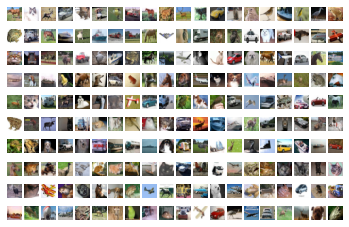

In [7]:
#Afficher les 200 premieres images
from matplotlib import pyplot as plt
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(X_train[i,:])
 plt.axis('off')
plt.show()

In [8]:
y_train[:10]

array([[7],
       [3],
       [4],
       [1],
       [3],
       [5],
       [2],
       [9],
       [7],
       [6]], dtype=uint8)

In [9]:
#Redimensionnement des données
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train.shape,y_test.shape

((5000,), (1000,))

In [10]:
classes =['airplane','automobile'	,'bird','cat','deer','dog'	,'frog'	,'horse','ship'	,'truck']

In [11]:
classes[1]

'automobile'

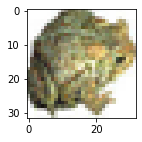

In [12]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[20])

In [13]:
# Afficher une seules image avec sa classe
def afficher_image(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

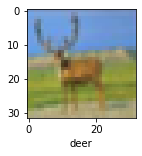

In [14]:
afficher_image(X_train,y_train,10)

In [15]:
#convertir les donées en flottants de 32 bits
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [16]:
X_train[0]

array([[[0.4117647 , 0.6156863 , 0.9607843 ],
        [0.43529412, 0.63529414, 0.98039216],
        [0.45882353, 0.65882355, 0.99607843],
        ...,
        [0.45490196, 0.6784314 , 0.99607843],
        [0.44313726, 0.65882355, 0.98039216],
        [0.39215687, 0.5686275 , 0.7882353 ]],

       [[0.4392157 , 0.64705884, 0.9882353 ],
        [0.45882353, 0.6627451 , 0.9843137 ],
        [0.47843137, 0.6901961 , 0.99215686],
        ...,
        [0.47843137, 0.69411767, 0.98039216],
        [0.47058824, 0.65882355, 0.9490196 ],
        [0.3372549 , 0.48235294, 0.61960787]],

       [[0.45490196, 0.6745098 , 1.        ],
        [0.4745098 , 0.69803923, 0.99607843],
        [0.49411765, 0.72156864, 1.        ],
        ...,
        [0.43529412, 0.58431375, 0.7372549 ],
        [0.40784314, 0.56078434, 0.68235296],
        [0.28235295, 0.41960785, 0.3764706 ]],

       ...,

       [[0.48235294, 0.50980395, 0.31764707],
        [0.4509804 , 0.4627451 , 0.2901961 ],
        [0.3764706 , 0

In [17]:
#fonction d'affichage des graphes
def affiche(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [18]:
print("nombre d'images en train : ", len(X_train))
print("nombre d'images en test : ", len(X_test))

print("la taille des images est : ", len(X_train[0]),'x',len(X_train[0][0]),"pixels")

print("Nombre de  de classes : ", len(classes))

nombre d'images en train :  5000
nombre d'images en test :  1000
la taille des images est :  32 x 32 pixels
Nombre de  de classes :  10


In [19]:
#Convertir les labels des variables en vecteurs binaires, où chaque vecteur a une longueur de 10
import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)



In [20]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input

# Définition du réseau
inputs = Input(shape=(32,32,3)) 
x = inputs
x = Convolution2D(32, kernel_size = (3, 3), activation='relu' )(x) 
x = Convolution2D(64, kernel_size = (3, 3), activation='relu' )(x) 
x = MaxPooling2D((3, 3))(x) 
x = Flatten()(x) 
x = Dense(256, activation='relu')(x)  
outputs= Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 256)               1327360   
                                                             

Epoch 1/26
20/20 [==============================] - 14s 67ms/step - loss: 2.2570 - accuracy: 0.1640 - val_loss: 2.2404 - val_accuracy: 0.1440
Epoch 2/26
20/20 [==============================] - 1s 31ms/step - loss: 2.0372 - accuracy: 0.2682 - val_loss: 2.0513 - val_accuracy: 0.2710
Epoch 3/26
20/20 [==============================] - 1s 26ms/step - loss: 1.8439 - accuracy: 0.3468 - val_loss: 1.7480 - val_accuracy: 0.3580
Epoch 4/26
20/20 [==============================] - 1s 31ms/step - loss: 1.7496 - accuracy: 0.3716 - val_loss: 1.6951 - val_accuracy: 0.3860
Epoch 5/26
20/20 [==============================] - 1s 27ms/step - loss: 1.6297 - accuracy: 0.4278 - val_loss: 1.5612 - val_accuracy: 0.4480
Epoch 6/26
20/20 [==============================] - 1s 26ms/step - loss: 1.5610 - accuracy: 0.4560 - val_loss: 1.6617 - val_accuracy: 0.3890
Epoch 7/26
20/20 [==============================] - 0s 24ms/step - loss: 1.4793 - accuracy: 0.4846 - val_loss: 1.6312 - val_accuracy: 0.4300
Epoch 8/26
2

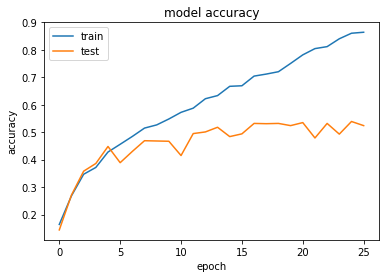

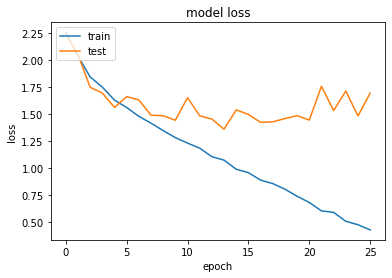

lr= 0.13 batch_size= 256 epochs= 26
Temps d apprentissage 42.130925364999996


In [21]:
import time

#Apprentissage

lr= 0.13
batch_size=256
epochs=26
sgd1= tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
tps1 = time.perf_counter()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1,validation_data=(X_test, Y_test))
tps2 = time.perf_counter()
affiche(history) #donnee en annexe
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)

In [22]:
#Evaluation du modèle
from sklearn.metrics import confusion_matrix


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 1.6937178373336792
Test accuracy: 52.399998903274536


Conclusion :

*   le modèle a obtenu une perte de 1.51 et une précision de 53.1% sur le X_test : il  a bien classifié 53.1 % des images de notre dataset.
*   Pour ameliorer la precision on peut ajouter des couches de convolutions et des neurones dans le réseau.



